#  Pneumonia-Chest Disease Prediction Using Convolutional Neural Network with Adaptive Layers

# Import libraries

In [32]:
import tensorflow as tf
from tensorflow import keras
from keras.layers.core import Activation, Dropout, Flatten, Dense
from keras.layers import Convolution2D as Conv2D
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator, load_img
import warnings

from sklearn.utils import shuffle
from tensorflow.keras.utils import to_categorical
from keras.models import load_model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense,BatchNormalization,Dropout,Input
from keras.models import Sequential, Model
from keras.layers import Conv2D,GlobalMaxPooling2D

import cv2

import os


from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline


# Import data 

In [33]:
for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        os.path.join(dirname, filename)

In [34]:
# get label Name  function  
def get_Label(number):
    labels = {0:'NORMAL', 1:'PNEUMONIA'}
    return labels[number]


In [35]:

labels = ['NORMAL','PNEUMONIA']
folders=['train','test','val']
def load_images_from_directory(main_dirictory,foldername):
    total_labels=[]
    images=[]
    total_normal=0
    total_pneumonia=0
    path = os.path.join(main_dirictory,foldername) 
    for lab in labels :
        full_path = os.path.join(path,lab)
        print (' loading ....... images of folder :',foldername+'/'+lab )  
        for image in os.listdir(full_path):
            img = cv2.imread(full_path+'/'+image)
            img = cv2.resize(img,(150,150))
            images.append(img)
            if lab  == 'NORMAL':
                    label =0
                    total_normal+= 1
            elif lab == 'PNEUMONIA' :
                    label = 1
                    total_pneumonia +=1
            total_labels.append(label)
    print('total normal image := ',total_normal)
    print('total Pneumonia    := ',total_pneumonia)
    return shuffle(images,total_labels,random_state=756349782)

In [8]:
image_path = './chest_xray/'
train_x,train_y=load_images_from_directory(image_path,"train")
test_x,test_y=load_images_from_directory(image_path,"test")

 loading ....... images of folder : train/NORMAL
 loading ....... images of folder : train/PNEUMONIA
total normal image :=  1341
total Pneumonia    :=  3875
 loading ....... images of folder : test/NORMAL
 loading ....... images of folder : test/PNEUMONIA
total normal image :=  234
total Pneumonia    :=  390


# Data visualization

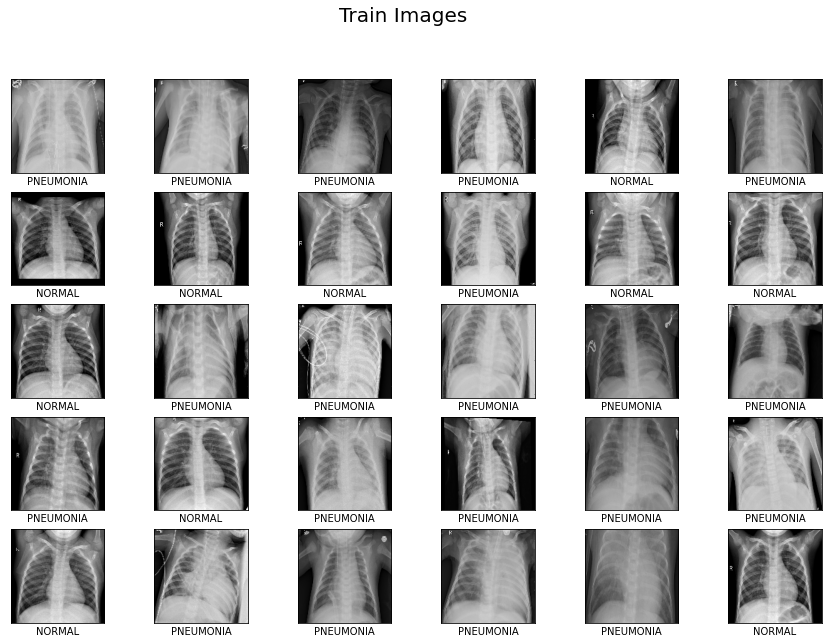

In [36]:
plt.figure(figsize=(15,10))
plt.suptitle("Train Images", fontsize=20)
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(get_Label(train_y[i]))
    plt.imshow(train_x[i], cmap=plt.cm.binary)

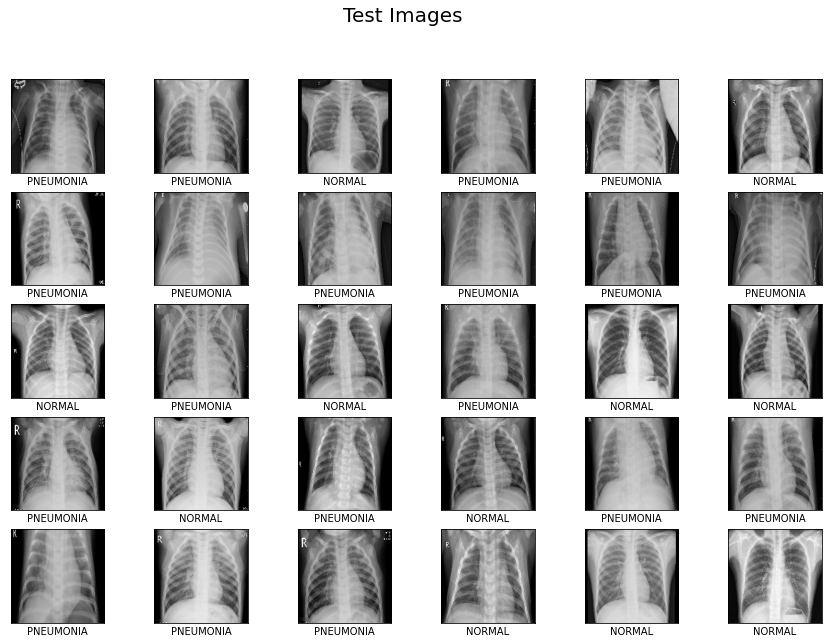

In [37]:
plt.figure(figsize=(15,10))
plt.suptitle("Test Images", fontsize=20)
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(get_Label(test_y[i]))
    plt.imshow(test_x[i], cmap=plt.cm.binary)

In [38]:
warnings.filterwarnings('ignore')

# Create model

In [39]:
input_shape=(64,64,3)

In [40]:
model = tf.keras.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3),  activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 64)         

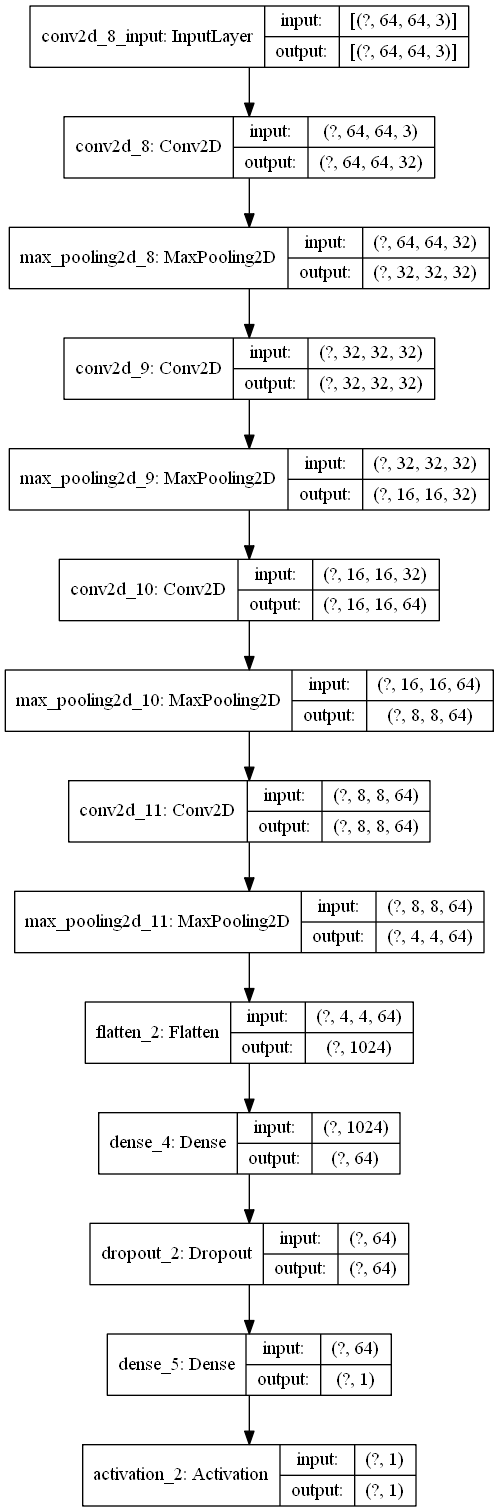

In [41]:
from keras.utils.vis_utils import plot_model

plot_model(model,
           to_file='model_plot.png',
           show_shapes=True, 
           show_layer_names=True)

In [42]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [18]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        './chest_xray/train',
        target_size=(64, 64),
        batch_size=64,
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        './chest_xray/test',
        target_size=(64, 64),
        batch_size=64,
        class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [14]:
history=model.fit(
        train_generator,
        steps_per_epoch=82,
        epochs=200,
        validation_data=validation_generator,
        validation_steps=82)

Epoch 1/200
82/82 [==============================] - 125s 2s/step - loss: 0.5745 - accuracy: 0.7402 - val_loss: 0.5105 - val_accuracy: 0.7196
Epoch 2/200
82/82 [==============================] - 113s 1s/step - loss: 0.3541 - accuracy: 0.8474
Epoch 3/200
82/82 [==============================] - 113s 1s/step - loss: 0.2662 - accuracy: 0.8898
Epoch 4/200
82/82 [==============================] - 112s 1s/step - loss: 0.2410 - accuracy: 0.9036
Epoch 5/200
82/82 [==============================] - 112s 1s/step - loss: 0.2059 - accuracy: 0.9225
Epoch 6/200
82/82 [==============================] - 117s 1s/step - loss: 0.1910 - accuracy: 0.9245
Epoch 7/200
82/82 [==============================] - 112s 1s/step - loss: 0.1845 - accuracy: 0.9312
Epoch 8/200
82/82 [==============================] - 112s 1s/step - loss: 0.1652 - accuracy: 0.9392
Epoch 9/200
82/82 [==============================] - 112s 1s/step - loss: 0.1585 - accuracy: 0.9404
Epoch 10/200
82/82 [==============================] - 112s

82/82 [==============================] - 57s 698ms/step - loss: 0.0667 - accuracy: 0.9764
Epoch 157/200
82/82 [==============================] - 57s 690ms/step - loss: 0.0661 - accuracy: 0.9768
Epoch 158/200
82/82 [==============================] - 57s 695ms/step - loss: 0.0686 - accuracy: 0.9762
Epoch 159/200
82/82 [==============================] - 56s 685ms/step - loss: 0.0718 - accuracy: 0.9758
Epoch 160/200
82/82 [==============================] - 57s 689ms/step - loss: 0.0729 - accuracy: 0.9745
Epoch 161/200
82/82 [==============================] - 58s 701ms/step - loss: 0.0709 - accuracy: 0.9780
Epoch 162/200
82/82 [==============================] - 397s 5s/step - loss: 0.0692 - accuracy: 0.9768
Epoch 163/200
82/82 [==============================] - 61s 744ms/step - loss: 0.0722 - accuracy: 0.9766
Epoch 164/200
82/82 [==============================] - 67s 815ms/step - loss: 0.0694 - accuracy: 0.9766
Epoch 165/200
82/82 [==============================] - 65s 791ms/step - loss: 0.

In [15]:
scores = model.evaluate(validation_generator)

print("Loss of the model: %.2f"%(scores[0]))
print("Test Accuracy: %.2f%%"%(scores[1] * 100))

10/10 [==============================] - 5s 488ms/step - loss: 0.5771 - accuracy: 0.9231
Loss of the model: 0.58
Test Accuracy: 92.31%


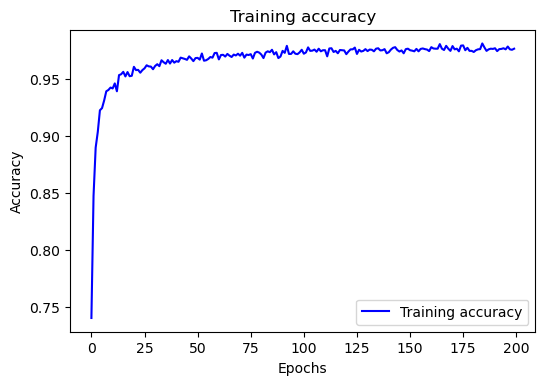

In [24]:
## plot loss for train and test

loss_train = history.history['loss']
loss_val = history.history['val_loss']
plt.figure(figsize=(6,4), dpi=100)
plt.plot(loss_train, 'b', label = 'Training loss')
#plt.plot(loss_val, 'r', label = 'Validation loss')
plt.title("Training Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## plot loss for train and test

loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
plt.figure(figsize=(6,4), dpi=100)
plt.plot( loss_train, 'b', label = 'Training accuracy')
#plt.plot( loss_val, 'r', label = 'Validation accuracy')
plt.title("Training accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [27]:
# Saving the model for future use
model.save('./custom_model.h5py')

INFO:tensorflow:Assets written to: ./custom_model.h5py\assets


In [43]:
def predict_image(filename):
    img = load_img(filename, target_size=(64, 64))
    image = keras.preprocessing.image.img_to_array(img)
    image = image / 255.0
    image = image.reshape(1,64,64,3)
    model = tf.keras.models.load_model('custom_model.h5py')
    prediction = model.predict(image)
    print(prediction)
    plt.imshow(img)
    if(prediction[0] > 0.5):
        stat = prediction[0] * 100 
        print("This image is %.2f percent %s"% (stat, "PNEUMONIA"))
    else:
        stat = (1.0 - prediction[0]) * 100
        print("This image is %.2f percent %s" % (stat, "NORMAL"))

  

In [44]:
image0= "./chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg"
image1 = "./chest_xray/test/PNEUMONIA/person20_virus_51.jpeg"

Predicted image0:
[[0.29030332]]
This image is 70.97 percent NORMAL


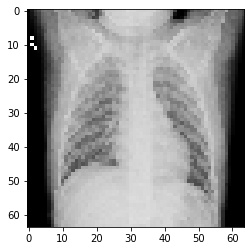

In [45]:
print("Predicted image0:")
predict_image(image0)

Predicted image1:
[[0.92098993]]
This image is 92.10 percent PNEUMONIA


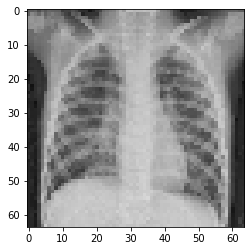

In [46]:
print("Predicted image1:")
predict_image(image1)

In [47]:
from datetime import date
today = date.today()
d2 = today.strftime("%B %d, %Y")
print("done on: ", d2)

done on:  June 13, 2022


In [48]:
print("Nour Ammar y2013 140008 yepay zeka")

Nour Ammar y2013 140008 yepay zeka
